In [3]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from jcopml.pipeline import num_pipe, cat_pipe
from jcopml.utils import save_model, load_model
from jcopml.plot import plot_missing_value
from jcopml.feature_importance import mean_score_decrease

from luwiji.logistic_regression import illustration

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/amongnikol/belajaraDataScienceJCOp/refs/heads/main/course3-regresi%26klasifikasiLanjutan/data/mushrooms.csv')
df.head()

,edible,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,False,convex,smooth,brown,True,pungent,free,close,narrow,black,...,smooth,white,white,partial,white,1,pendant,black,scattered,urban
1,True,convex,smooth,yellow,True,almond,free,close,broad,black,...,smooth,white,white,partial,white,1,pendant,brown,numerous,grasses
2,True,bell,smooth,white,True,anise,free,close,broad,brown,...,smooth,white,white,partial,white,1,pendant,brown,numerous,meadows
3,False,convex,scaly,white,True,pungent,free,close,narrow,brown,...,smooth,white,white,partial,white,1,pendant,black,scattered,urban
4,True,convex,smooth,gray,False,none,free,crowded,broad,black,...,smooth,white,white,partial,white,1,evanescent,brown,abundant,grasses


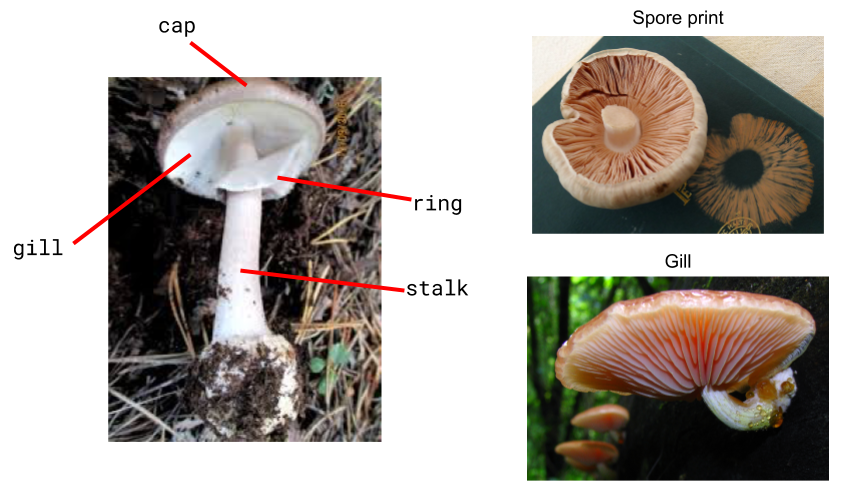

In [4]:
illustration.mushroom

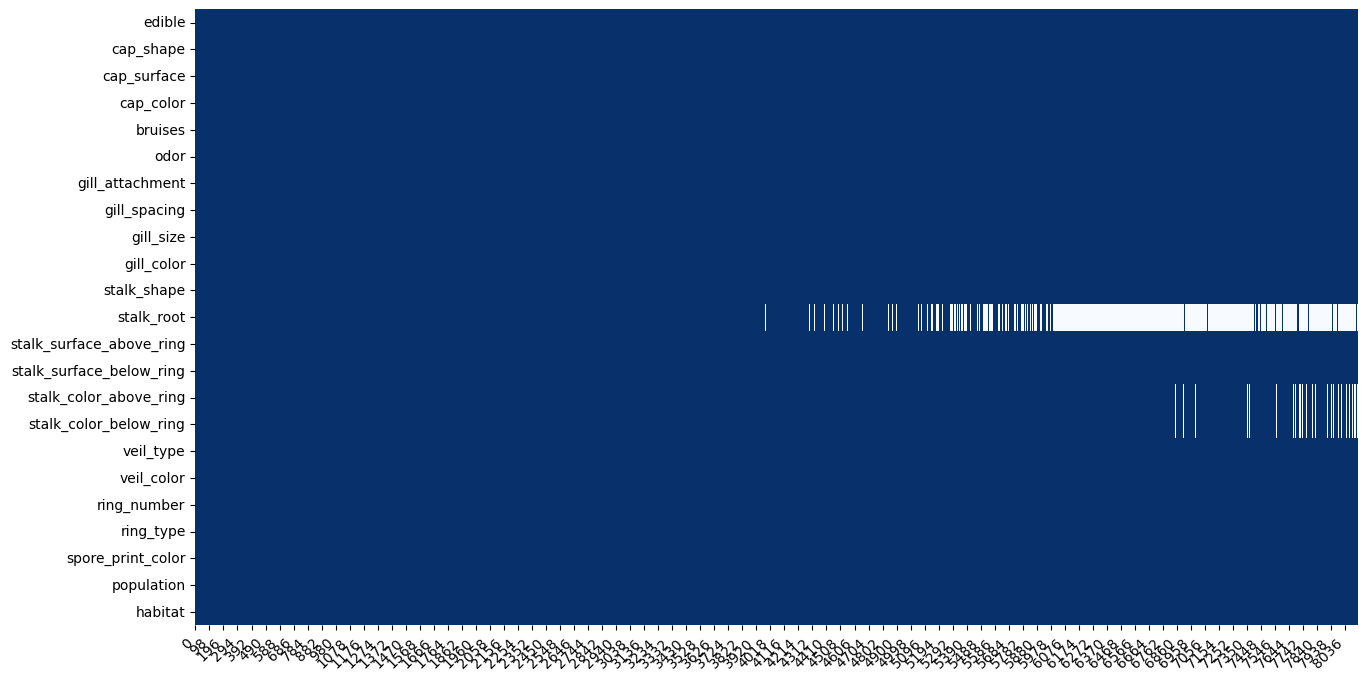

In [5]:
plot_missing_value(df)

In [6]:
df.edible.value_counts()

True     4208
False    3916
Name: edible, dtype: int64

# association matrix(sama kayak correlation matrix namun ini untuk categoric)

In [8]:
df.drop(columns='veil_type', inplace=True)

In [9]:
from jcopml.plot import plot_association_matrix

plot_association_matrix(df, 'edible', categoric_col='auto')

interactive(children=(ToggleButtons(description='method', options=("Cramer's V", 'Proficiency U(X|Y)', 'Profic…

# dataset splitting

In [11]:
x = df[['odor', 'gill_color', 'ring_type', 'spore_print_color']]
y = df.edible

# stratify untuk membagi target ke test dan training seimbang# training
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((6499, 4), (1625, 4), (6499,), (1625,))

# training

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from jcopml.tuning import grid_search_params as gsp
from jcopml.tuning.space import Integer, Real

In [14]:
preprocessor = ColumnTransformer([
    ('categoric', cat_pipe(encoder='onehot'), x_train.columns)
   
])

# optimizernya tidak pakai gradient descent biasa melainkan menggunakan lbfgs
pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', LogisticRegression(solver='lbfgs', n_jobs=-1, random_state=42))
])

# cv = cross validation
model = GridSearchCV(pipeline, gsp.logreg_params, cv=3, n_jobs=-1, verbose=1)
model.fit(x_train, y_train)

print(model.best_params_)
print(model.score(x_train, y_train), model.best_score_, model.score(x_test, y_test))

Fitting 3 folds for each of 14 candidates, totalling 42 fits
{'algo__C': 10.0, 'algo__fit_intercept': True}
0.9938452069549162 0.9938453960417766 0.9975384615384615


# evaluation

In [15]:
from jcopml.plot import plot_confusion_matrix, plot_classification_report, plot_roc_curve, plot_pr_curve

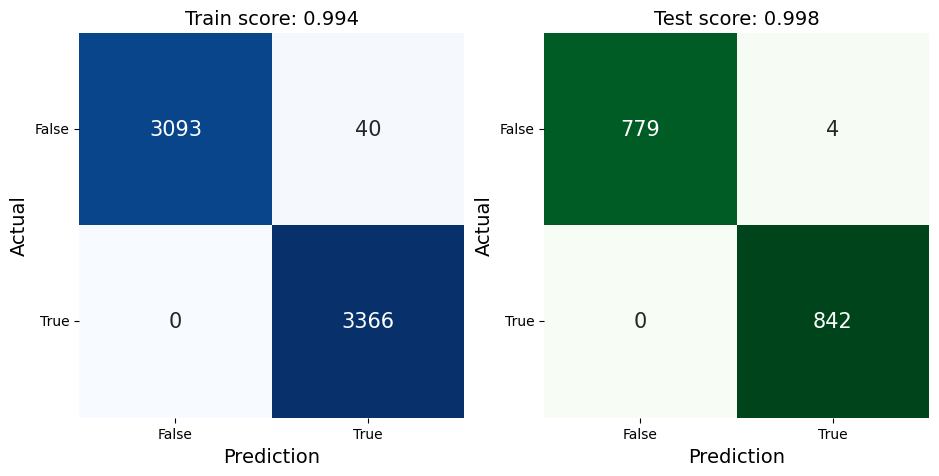

In [16]:
plot_confusion_matrix(x_train, y_train, x_test, y_test, model)

In [17]:
plot_classification_report(x_train, y_train, x_test, y_test, model, report=True)

Train report
              precision    recall  f1-score   support

       False       1.00      0.99      0.99      3133
        True       0.99      1.00      0.99      3366

    accuracy                           0.99      6499
   macro avg       0.99      0.99      0.99      6499
weighted avg       0.99      0.99      0.99      6499


Test report
              precision    recall  f1-score   support

       False       1.00      0.99      1.00       783
        True       1.00      1.00      1.00       842

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



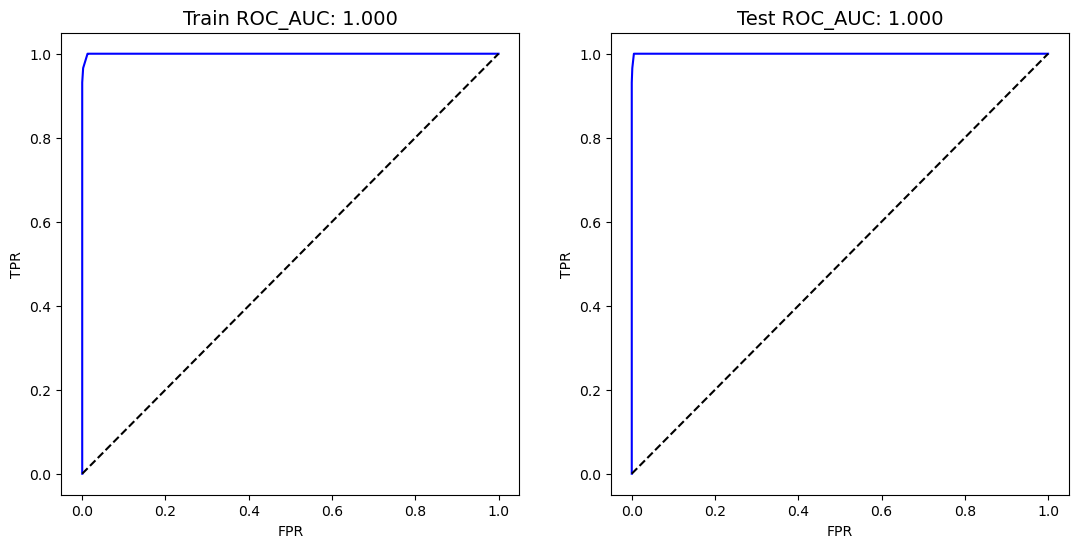

In [18]:
plot_roc_curve(x_train, y_train, x_test, y_test, model)

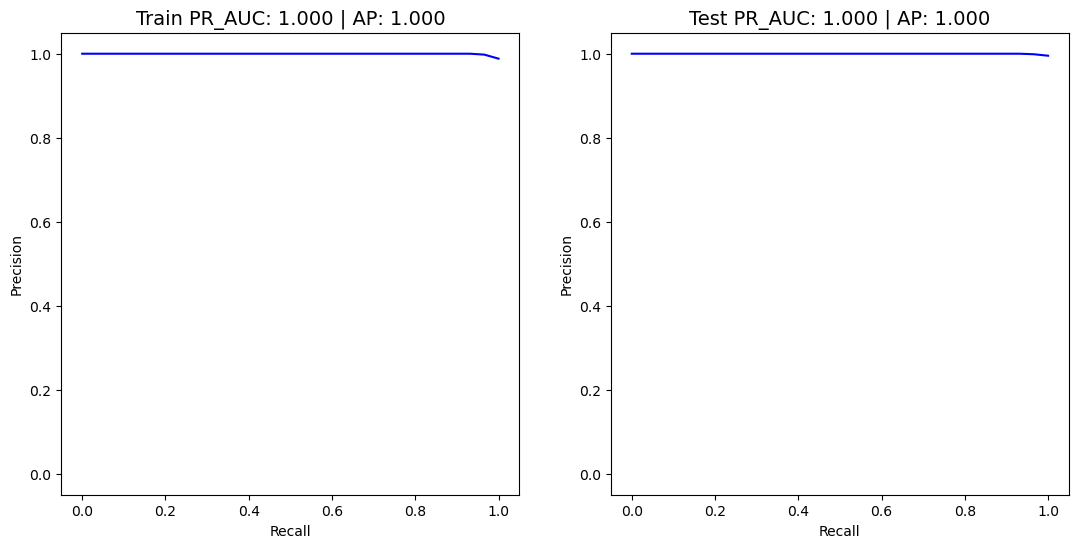

In [19]:
plot_pr_curve(x_train, y_train, x_test, y_test, model)

# feature importance

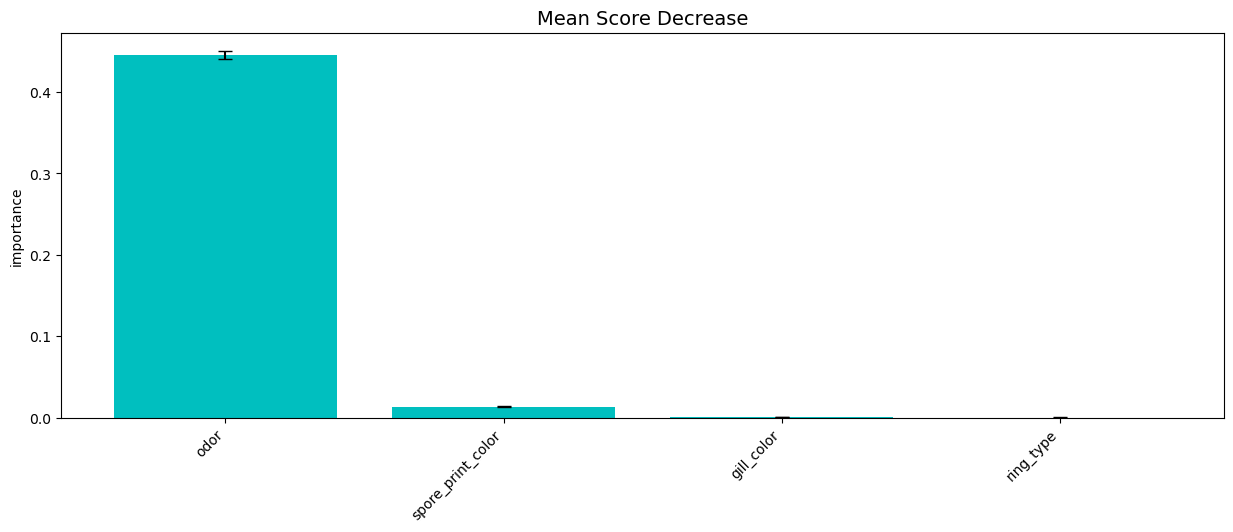

In [20]:
df_imp = mean_score_decrease(x_train, y_train, model, plot=True)

## insight from data

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

c:\Users\akmal\anaconda3\envs\jcopml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\akmal\anaconda3\envs\jcopml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\akmal\anaconda3\envs\jcopml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.w

<AxesSubplot:xlabel='ring_type', ylabel='count'>

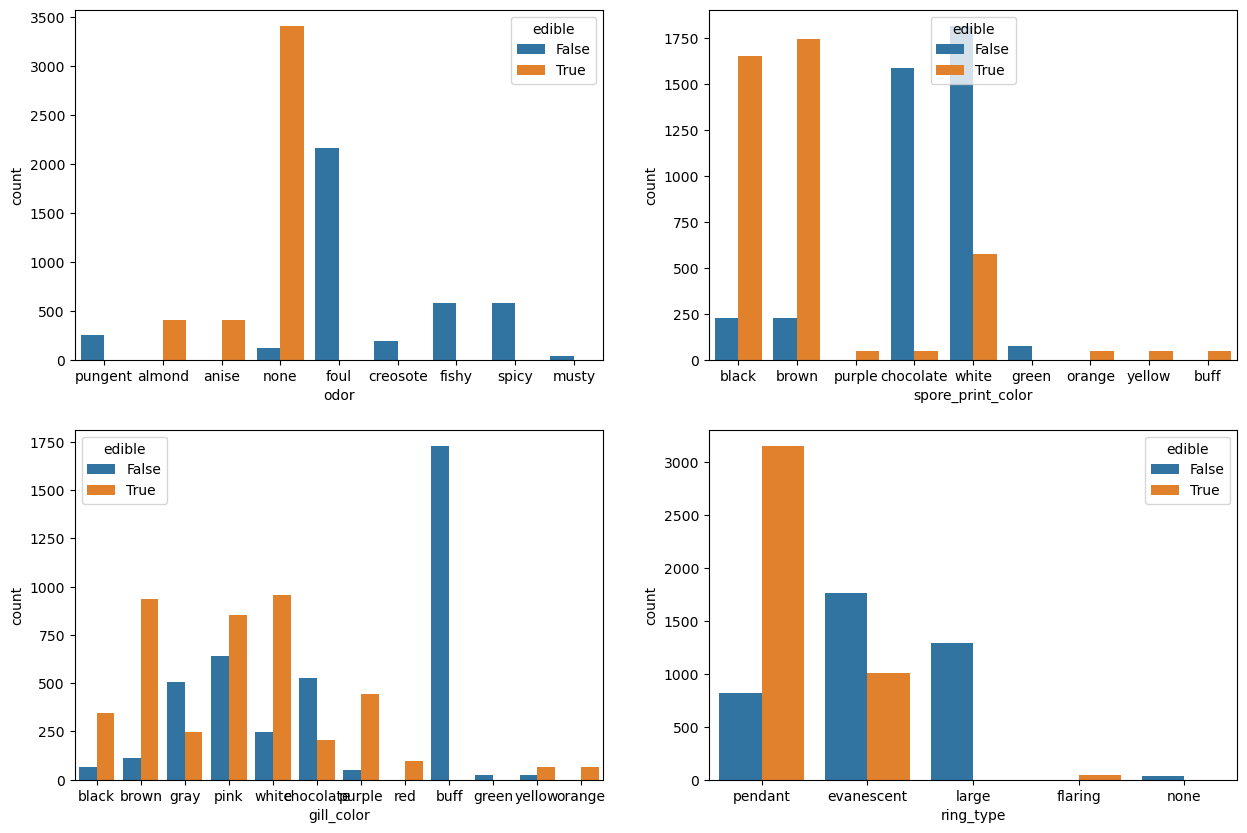

In [24]:
plt.figure(figsize=(15, 10))
plt.subplot(221)
sns.countplot('odor', data=df, hue='edible')
plt.subplot(222)
sns.countplot('spore_print_color', data=df, hue='edible')
plt.subplot(223)
sns.countplot('gill_color', data=df, hue='edible')
plt.subplot(224)
sns.countplot('ring_type', data=df, hue='edible')